# Predicción de permanencia de clientes en la cadena de gimnasios Model Fitness

### Descripción del proyecto:
La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_gym = pd.read_csv('/datasets/gym_churn_us.csv')

## Análisis exploratorio de datos (EDA)

In [3]:
print(data_gym.shape)
print(data_gym.head())

(4000, 14)
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_m

In [4]:
data_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
data_gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
cacelacion_vs_retencion = data_gym.groupby('Churn')
print(cacelacion_vs_retencion.mean())

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

In [7]:
print(cacelacion_vs_retencion['gender'].count())

Churn
0    2939
1    1061
Name: gender, dtype: int64


In [8]:
caracteristicas = data_gym.drop('Churn', axis=1).columns

In [9]:
print(caracteristicas)

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month'],
      dtype='object')


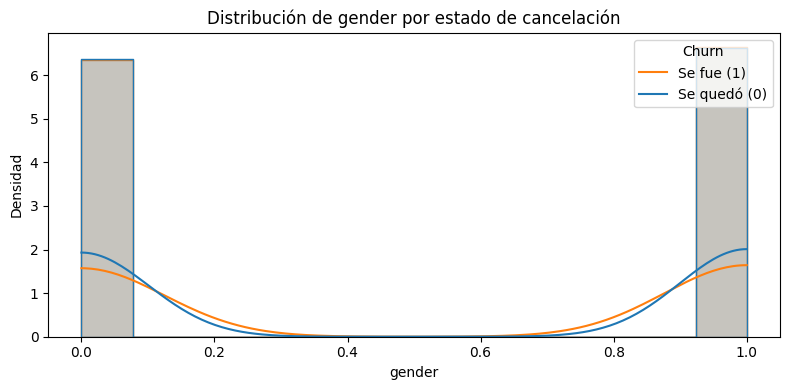

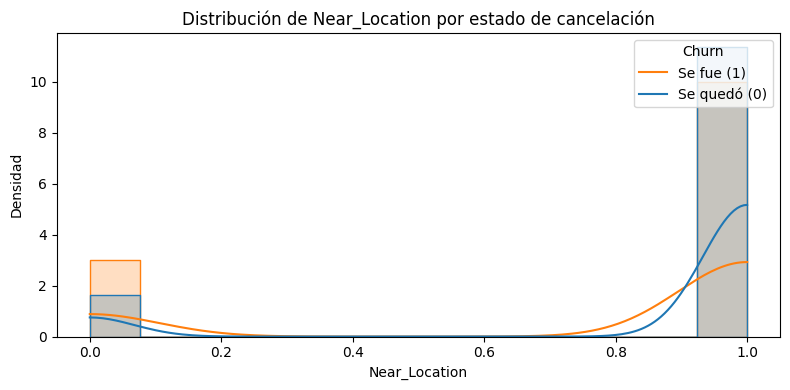

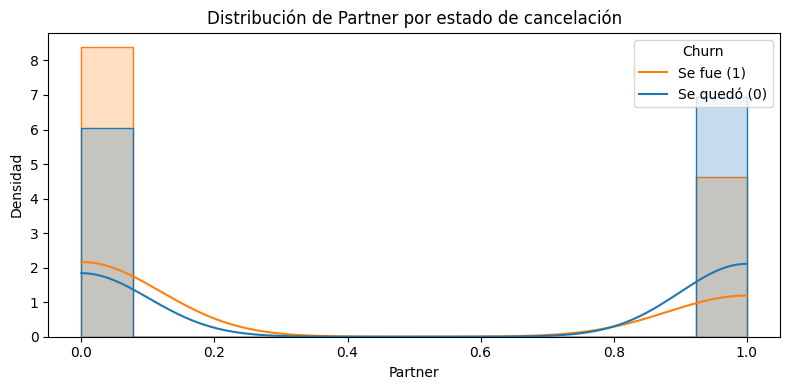

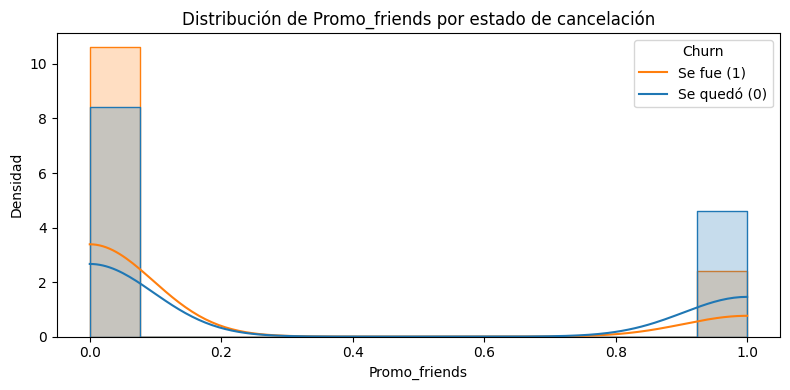

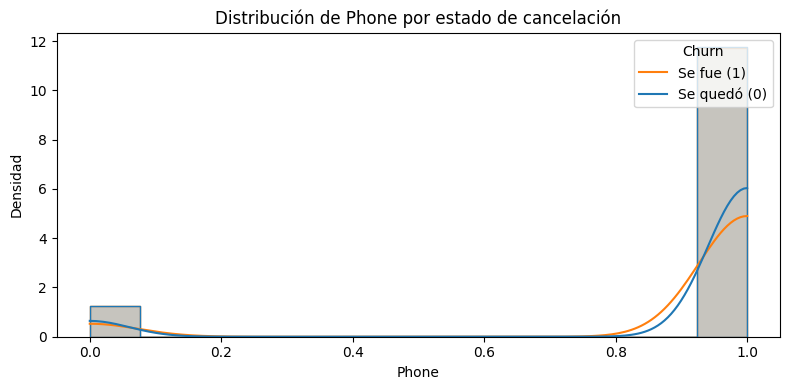

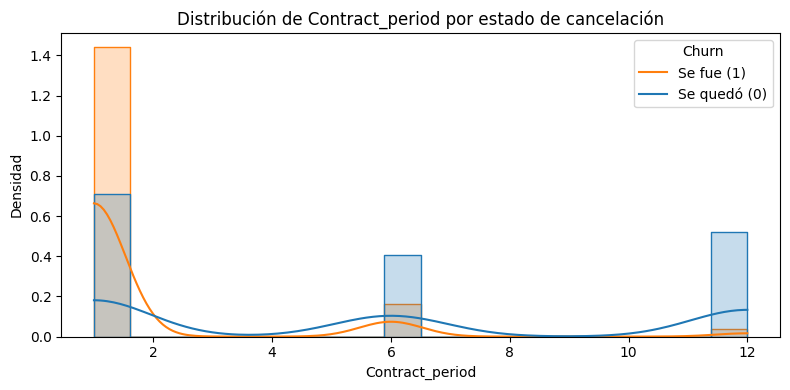

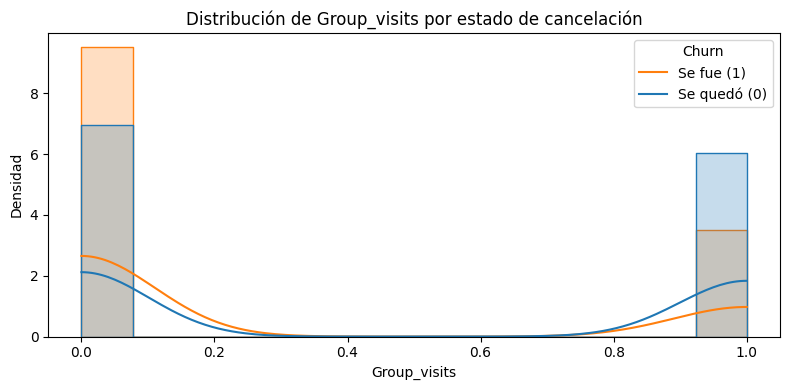

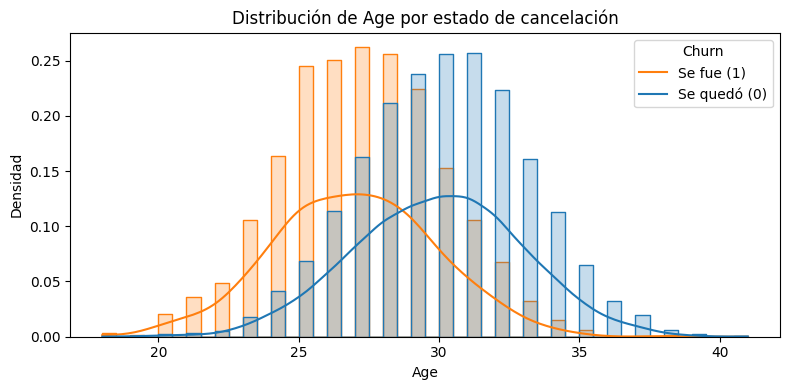

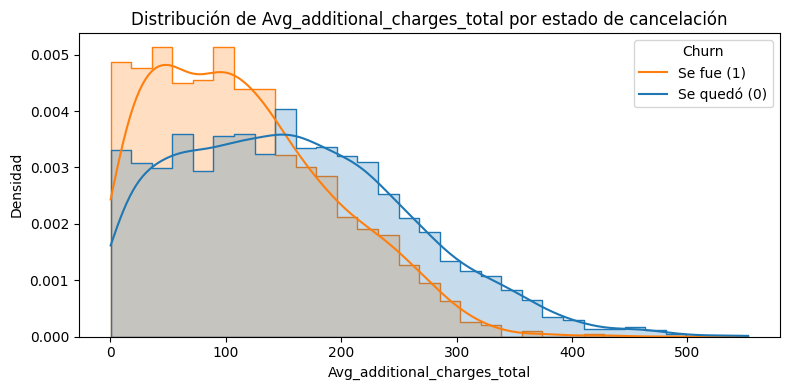

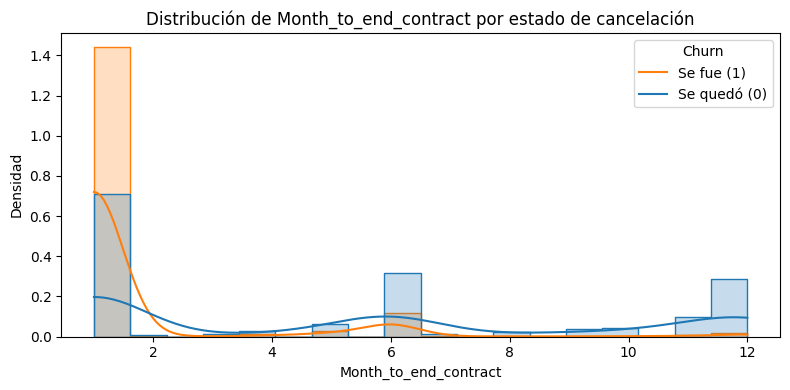

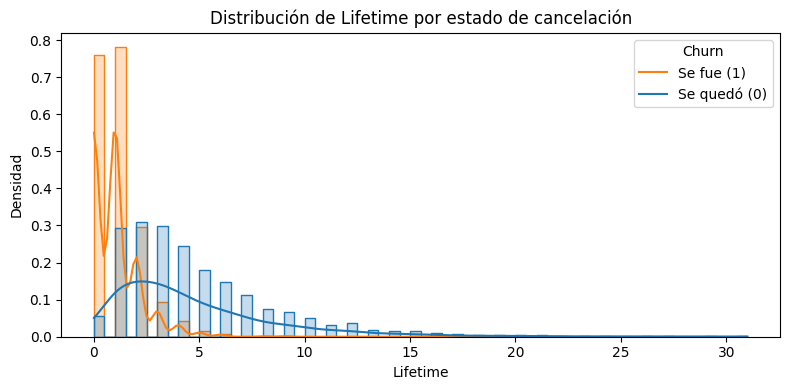

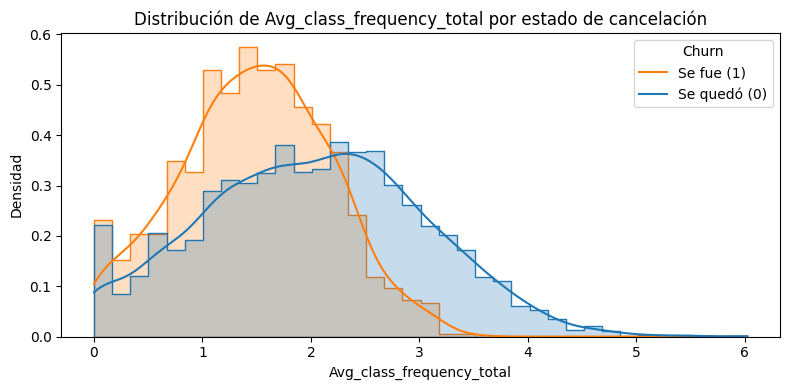

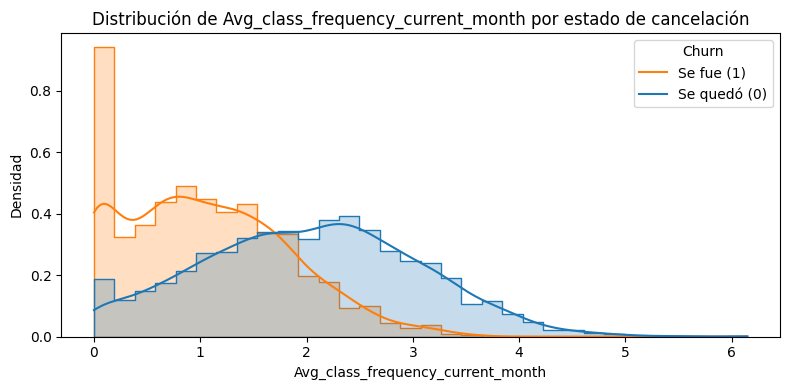

In [10]:
for col in caracteristicas:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data_gym, x=col, hue='Churn', kde=True, stat="density", element="step", common_norm=False)
    plt.title(f'Distribución de {col} por estado de cancelación')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend(title='Churn', labels=['Se fue (1)', 'Se quedó (0)'])
    plt.tight_layout()
    plt.show()

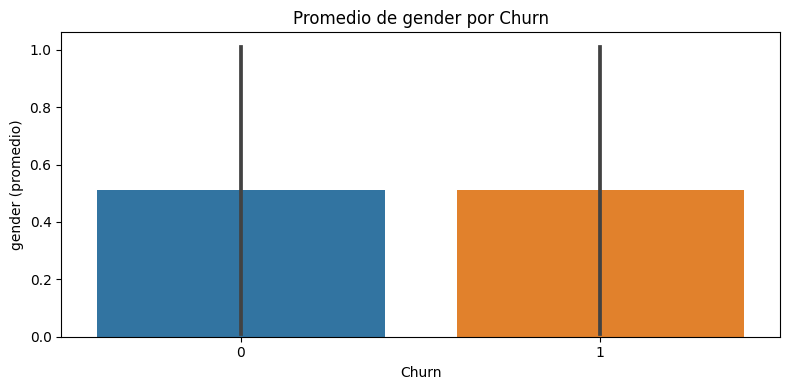

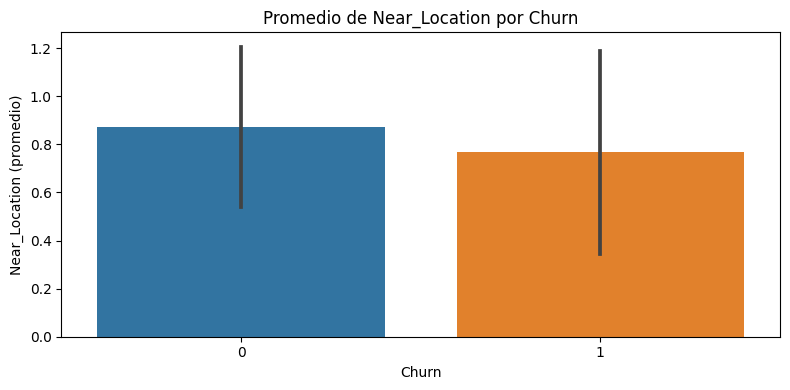

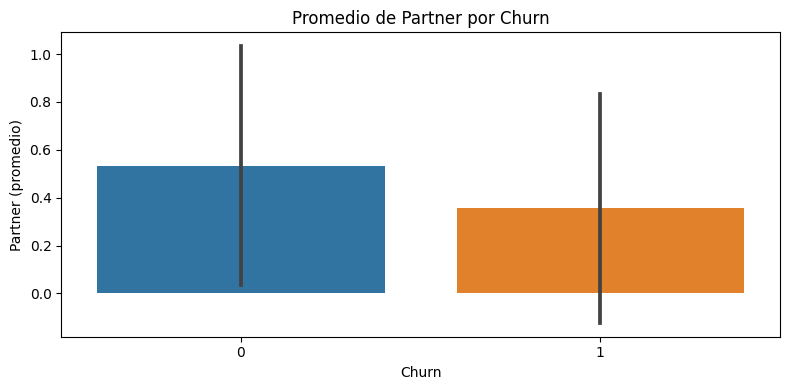

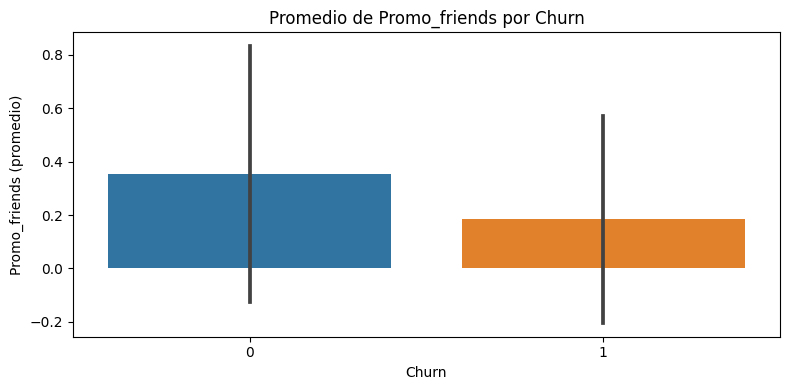

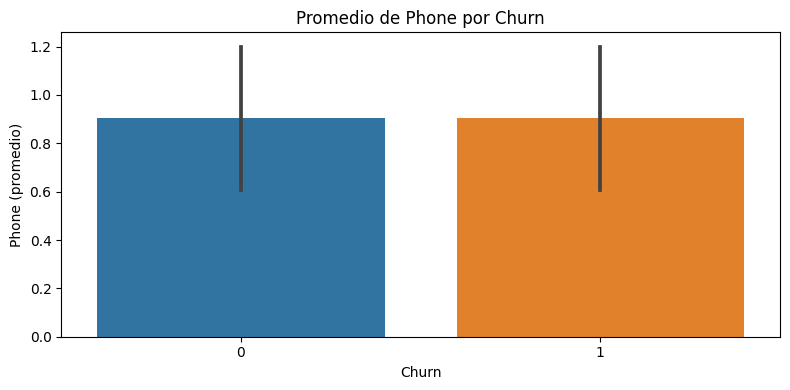

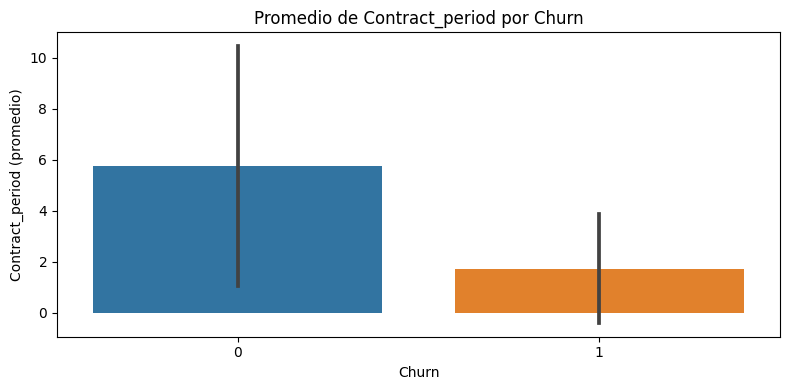

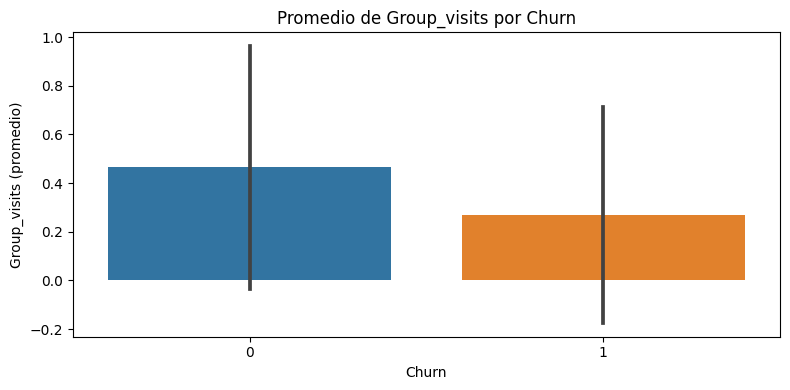

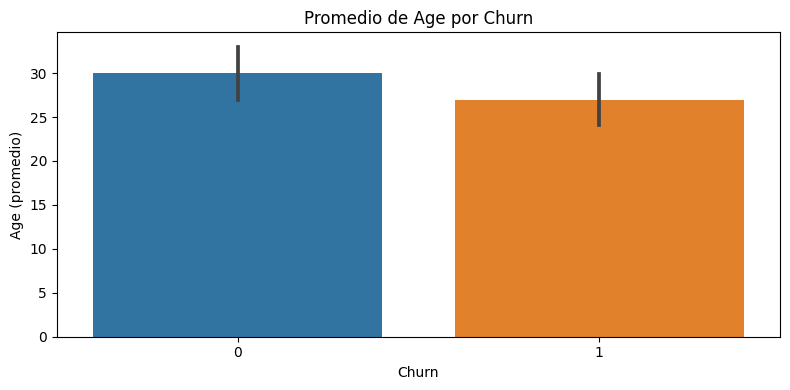

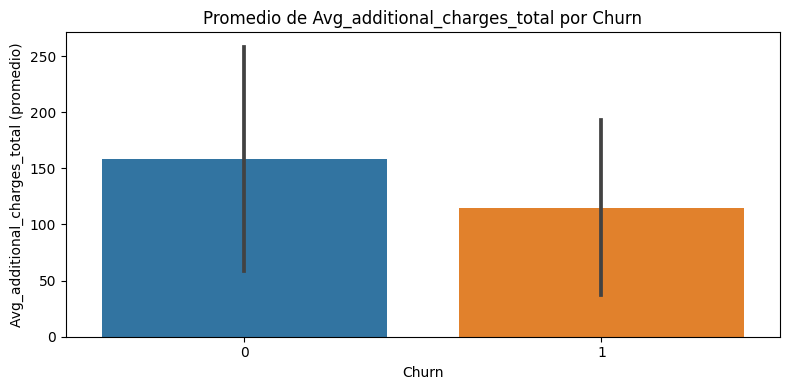

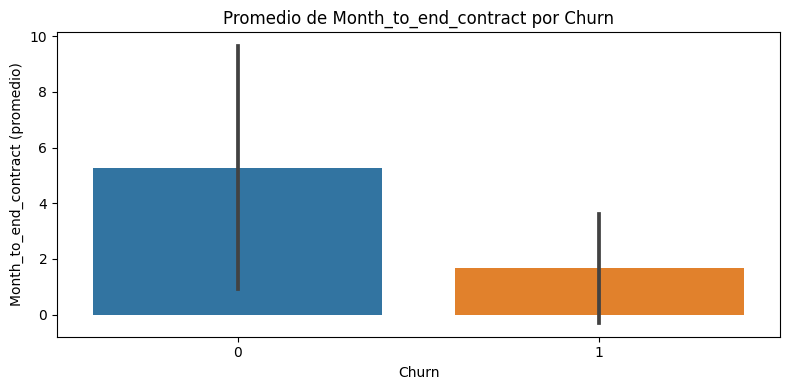

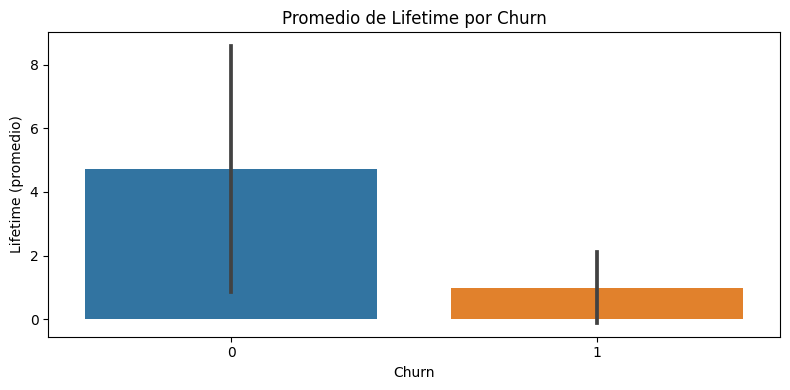

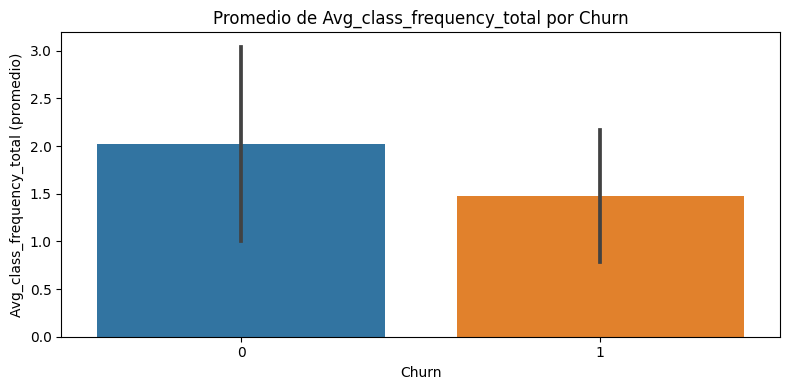

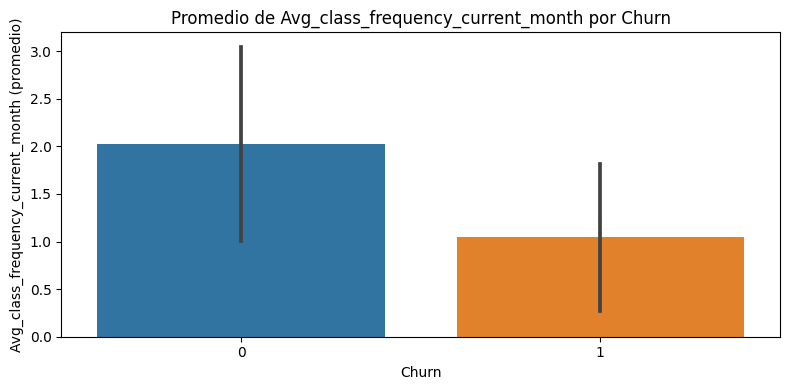

In [11]:
for col in caracteristicas:
    plt.figure(figsize = (8, 4))
    sns.barplot(data=data_gym, x = 'Churn', y = col, palette = 'tab10', ci = 'sd')
    plt.title(f'Promedio de {col} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(f'{col} (promedio)')
    
    plt.tight_layout()
    plt.show()

In [12]:
matriz_correlacion = data_gym.corr()

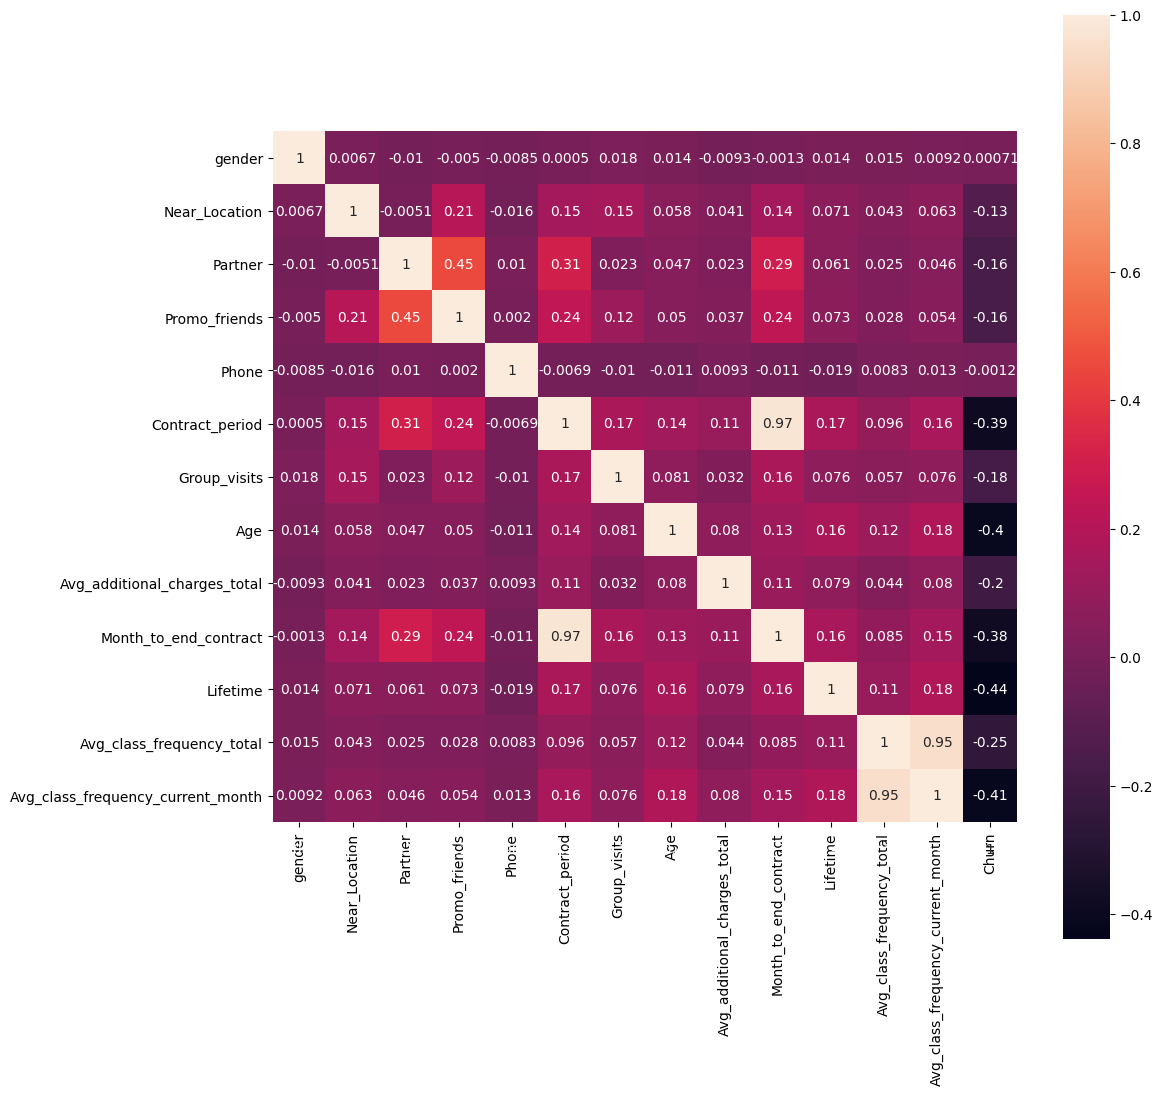

In [13]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(matriz_correlacion, annot = True, square = True)
ax.set_ylim(13,0)
plt.show()

## Conclusiones Parte 1

Se una clara diferencia en algunas de las caracteristicas entre el grupo de personas que se quedo y el que fue. En promedio el grupo que se quedo habia una mayor cantidad de usuarios que vive o trabaja en el vecindario del gimnasio y/o que esta asociado a una empresa que recibe descuento de empleados, o ingresaron con una promoción de amigos. Los usuarios más fieles en promedio tambien pagaban contratos de periodos más grandes, solian participar en sesiones grupales, realizaban más visitas semanales y mensuales y tenian una mayor antiguedad en comparación con los usuarios que avandonaban el gymnasio

# Construcción del modelo

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [15]:
X = data_gym.drop('Churn', axis = 1)
y = data_gym['Churn']

In [16]:
# Division del set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [17]:
# Normalización de datos
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [18]:
# Entrenamiento del modelo
logistic_model = LogisticRegression(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)

In [19]:
logistic_model.fit(X_train_st, y_train)
tree_model.fit(X_train_st, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_log = logistic_model.predict(X_test_st)
log_proba = logistic_model.predict_proba(X_test_st)[:,1]

y_tree = tree_model.predict(X_test_st)
tree_proba = tree_model.predict_proba(X_test_st)[:,1]

In [21]:
print('Metricas de la regresión logistica')
print('Accuracy: {:.2f}'. format(accuracy_score(y_test, y_log)))
print('Precision: {:.2f}'. format(precision_score(y_test, y_log)))
print('Recall: {:.2f}'. format(recall_score(y_test, y_log)))
print('F1: {:.2f}'. format(f1_score(y_test, y_log)))
print('ROC_AUC: {:.2f}'. format(roc_auc_score(y_test, log_proba)))

Metricas de la regresión logistica
Accuracy: 0.92
Precision: 0.87
Recall: 0.78
F1: 0.83
ROC_AUC: 0.97


In [22]:
print('Metricas del arbol de decisión')
print('Accuracy: {:.2f}'. format(accuracy_score(y_test, y_tree)))
print('Precision: {:.2f}'. format(precision_score(y_test, y_tree)))
print('Recall: {:.2f}'. format(recall_score(y_test, y_tree)))
print('F1: {:.2f}'. format(f1_score(y_test, y_tree)))
print('ROC_AUC: {:.2f}'. format(roc_auc_score(y_test, tree_proba)))

Metricas del arbol de decisión
Accuracy: 0.88
Precision: 0.76
Recall: 0.75
F1: 0.75
ROC_AUC: 0.84


## Predicción de usuarios que se iran el proximo mes

In [23]:
usuarios_actuales = data_gym[data_gym['Churn'] == 0]

In [24]:
X_act = usuarios_actuales.drop('Churn', axis = 1)

In [25]:
X_act['Lifetime'] = X_act['Lifetime'] + 1
X_act['Month_to_end_contract'] = X_act['Month_to_end_contract'] - 1

In [26]:
X_act_st = scaler.transform(X_act)

In [27]:
y_act = logistic_model.predict(X_act_st)

In [28]:
X_act['Churn'] = y_act

In [29]:
print(X_act['Churn'].count())

2939


In [30]:
print(X_act[X_act['Churn'] == 1]['Churn'].count())

41


## Conclusión parte 2
Si el resto de las caracteristicas se mantienen constantes, aproximadamente 41 usuarios abandonaran el gimnasio 

# Obtención de grupos de clientes

In [31]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [32]:
X_st = scaler.fit_transform(X)

In [33]:
linked = linkage(X_st, method = 'ward')

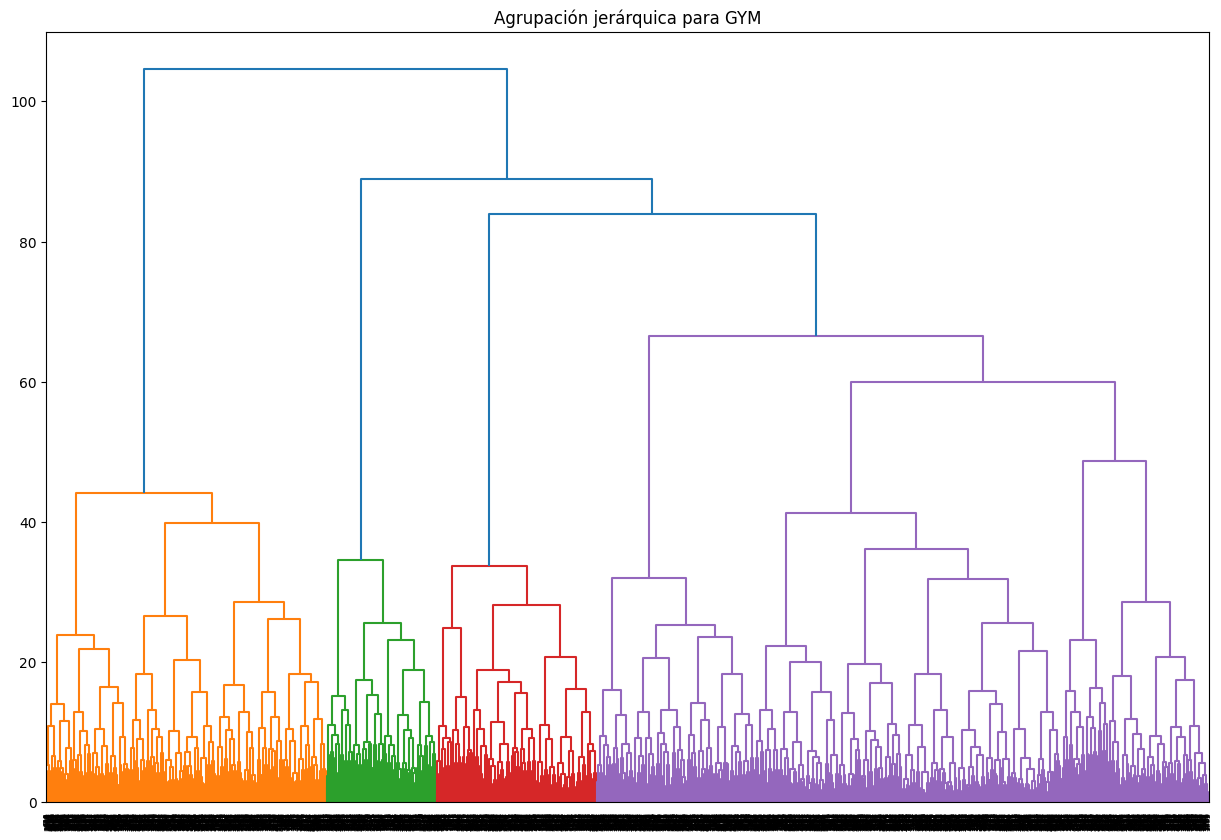

In [34]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM')
plt.show()

In [35]:
km = KMeans(n_clusters = 5)

labels = km.fit_predict(X_st)
data_gym['cluster_km'] = labels 

In [36]:
data_gym.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.496324,0.000000,0.466912,0.077206,0.915441,2.209559,0.215074,28.483456,133.630215,2.073529,2.781250,1.657657,1.466870,0.450368
1,0.488708,1.000000,0.242999,0.020777,0.902439,1.986450,0.320687,28.209575,131.151639,1.902439,2.391147,1.272203,1.029702,0.526649
2,0.585398,0.971317,0.259452,0.089961,0.903520,2.809648,0.477184,30.142112,161.875250,2.588005,5.147327,2.880231,2.881432,0.069100
3,0.486068,0.998452,0.823529,1.000000,0.899381,3.165635,0.456656,29.224458,141.868789,2.927245,3.739938,1.742540,1.636485,0.246130
4,0.498932,0.944444,0.740385,0.485043,0.900641,11.884615,0.551282,29.931624,164.625700,10.877137,4.674145,1.999110,1.990516,0.022436


In [37]:
new_columns = data_gym.drop('cluster_km', axis = 1).columns

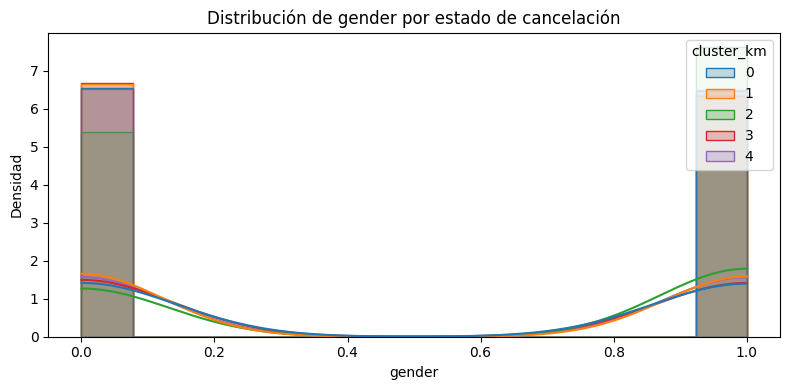

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


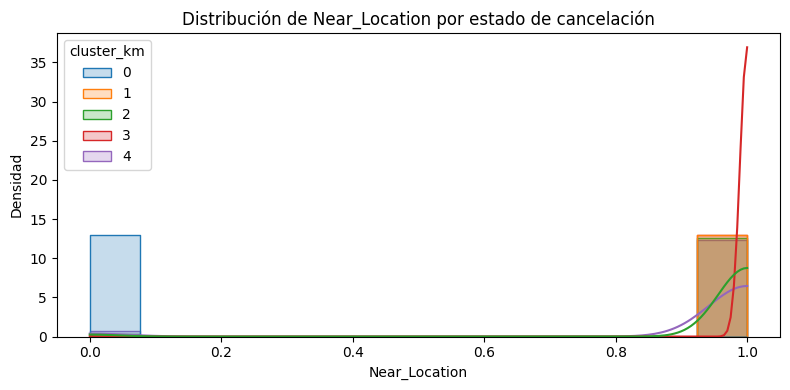

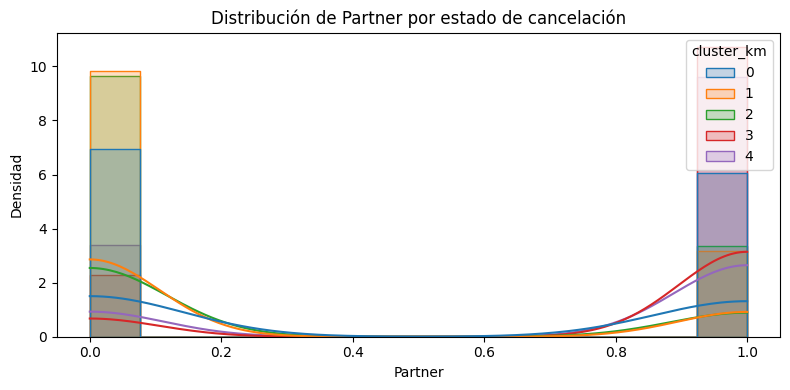

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


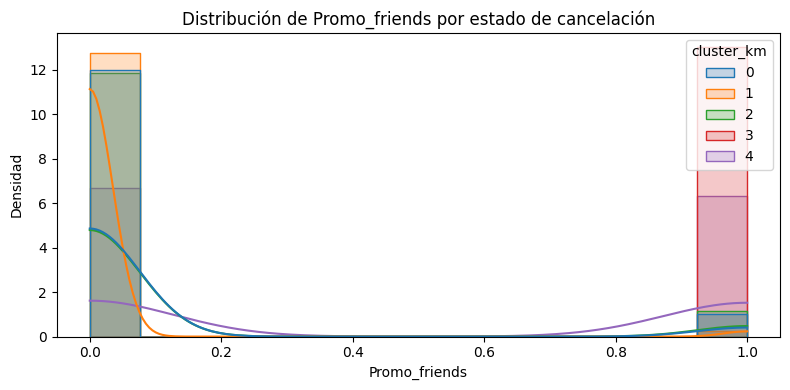

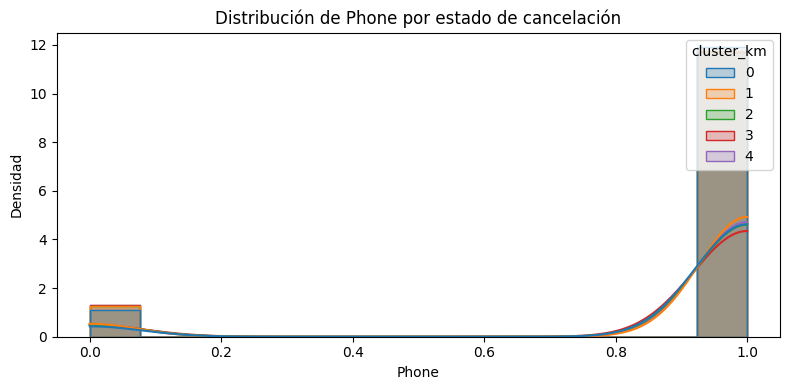

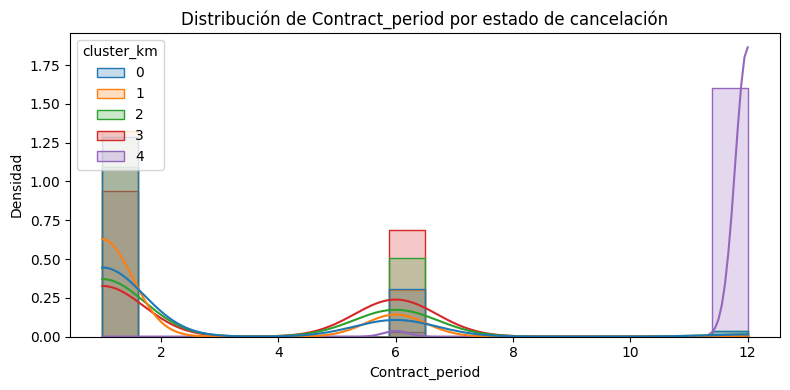

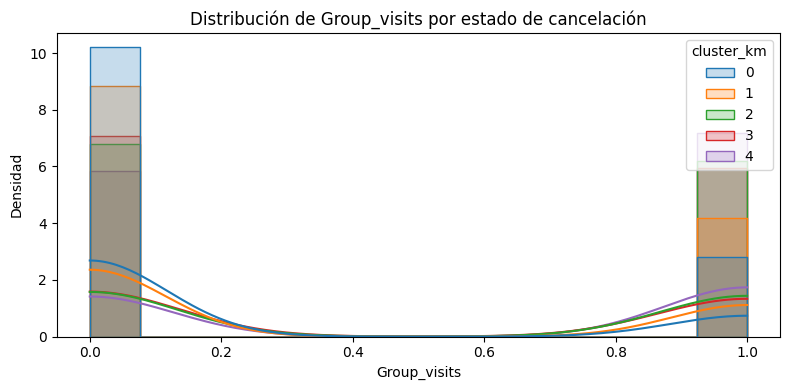

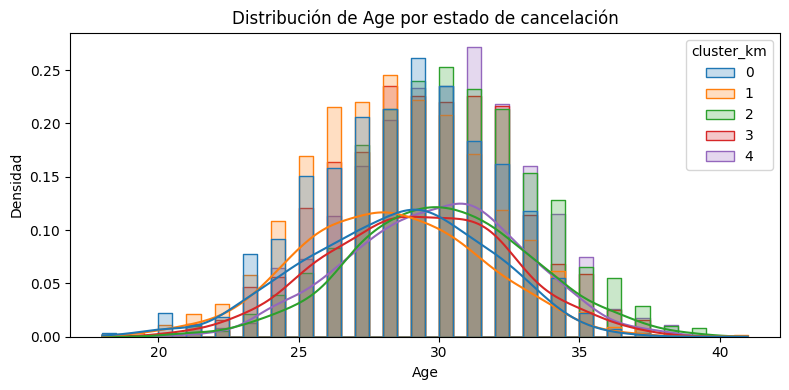

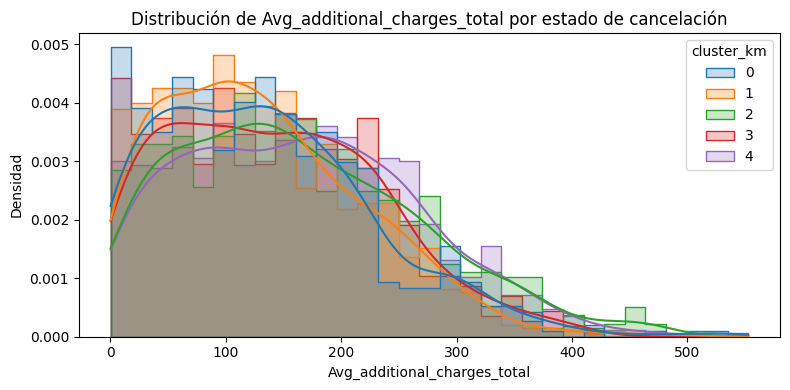

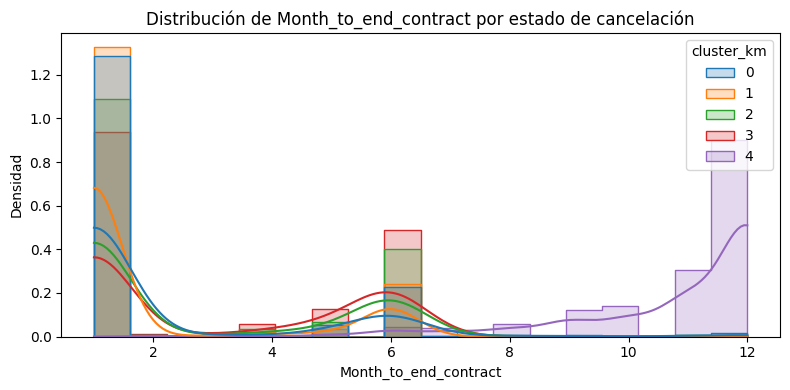

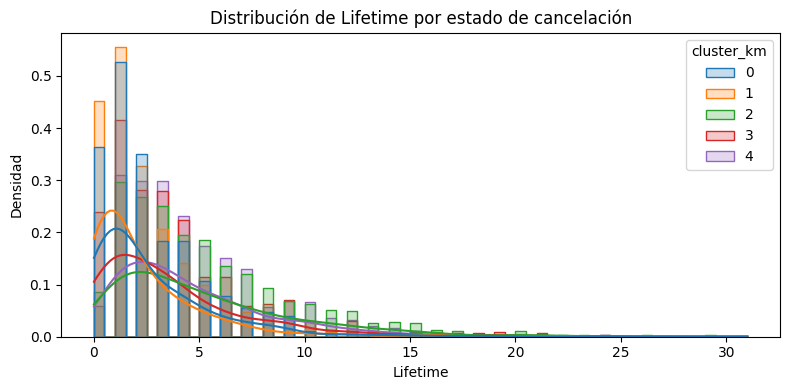

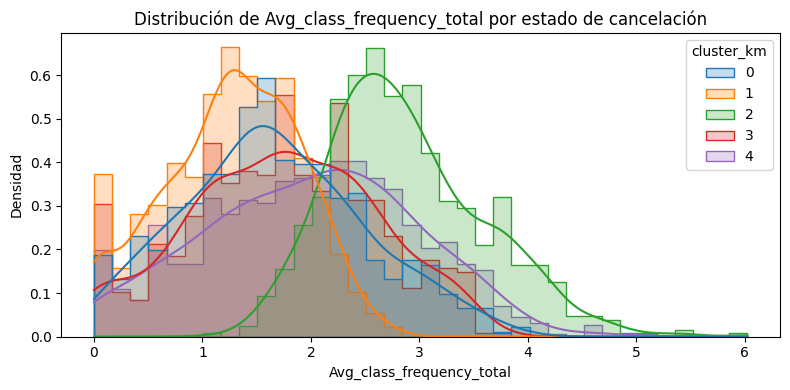

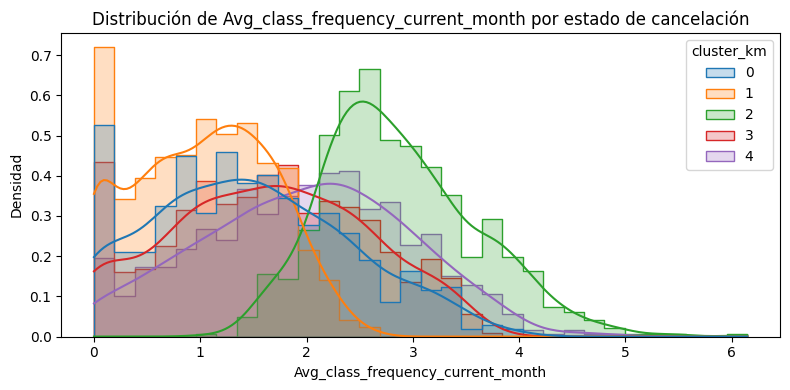

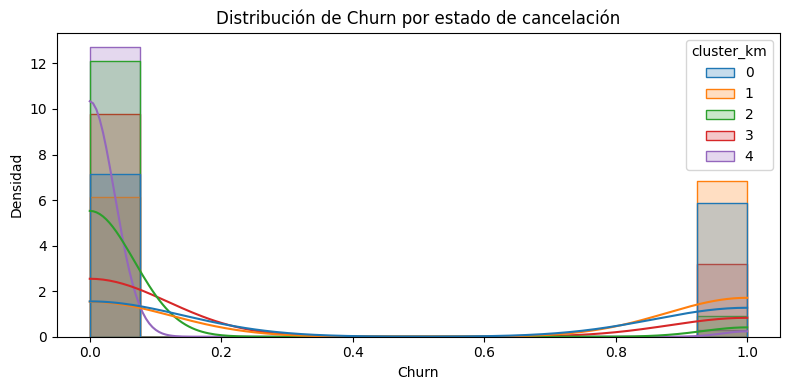

In [38]:
for col in new_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data_gym, x=col, hue='cluster_km', kde=True, stat="density", element="step", palette='tab10', common_norm=False)
    plt.title(f'Distribución de {col} por estado de cancelación')
    plt.xlabel(col)
    plt.ylabel('Densidad')
   
    plt.tight_layout()
    plt.show()

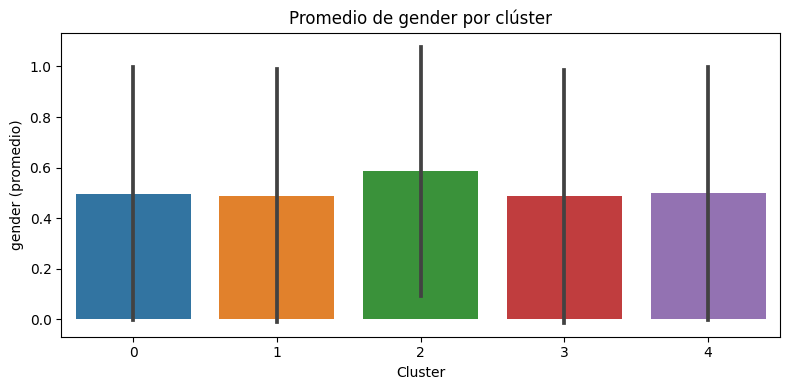

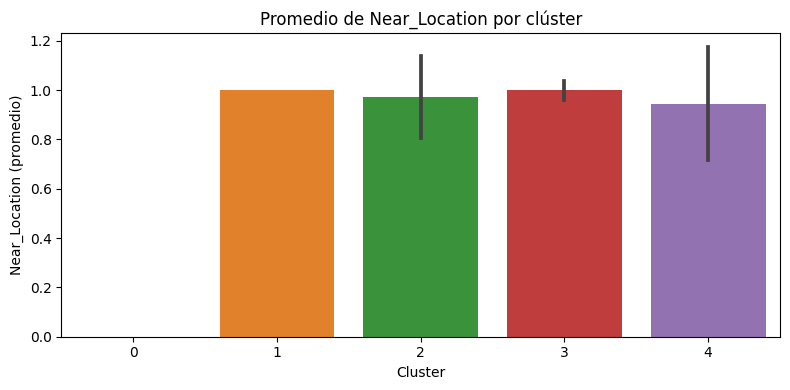

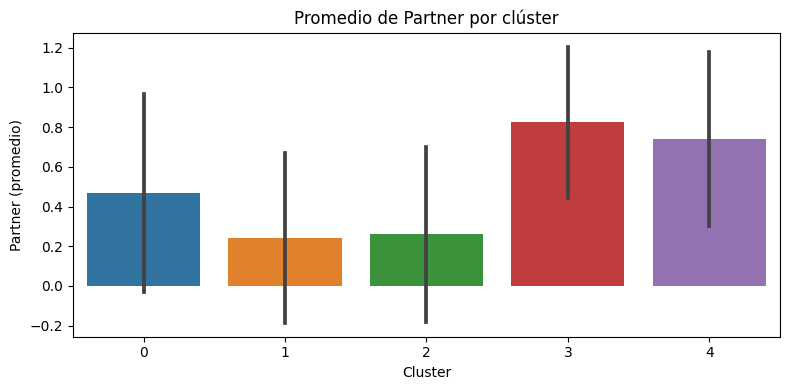

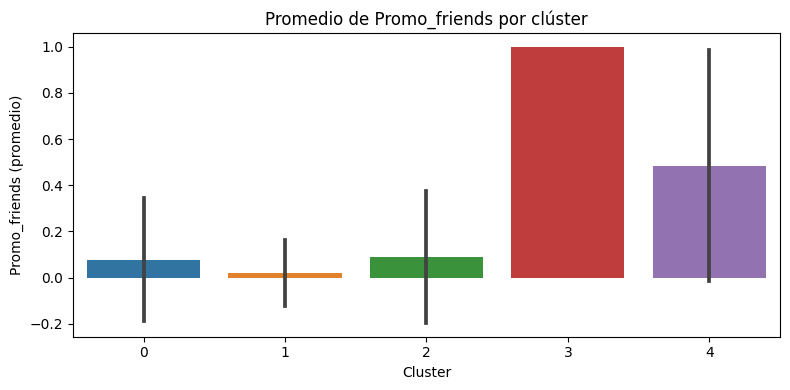

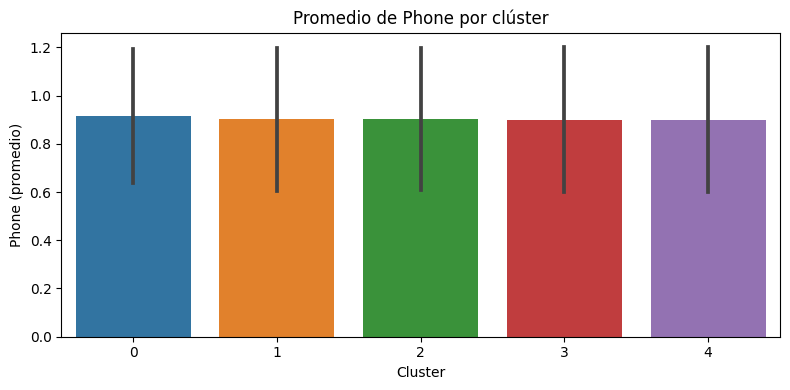

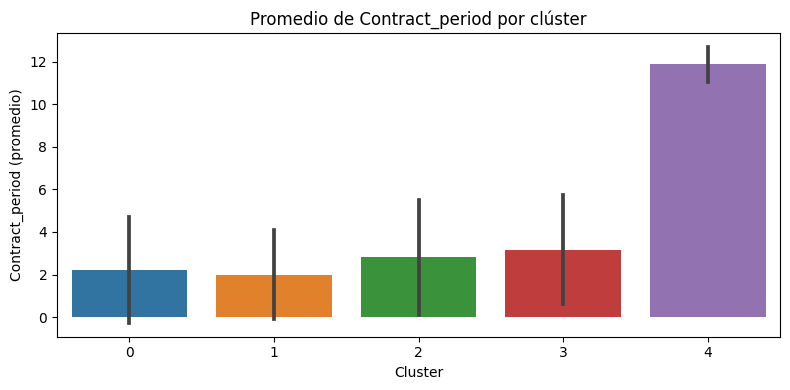

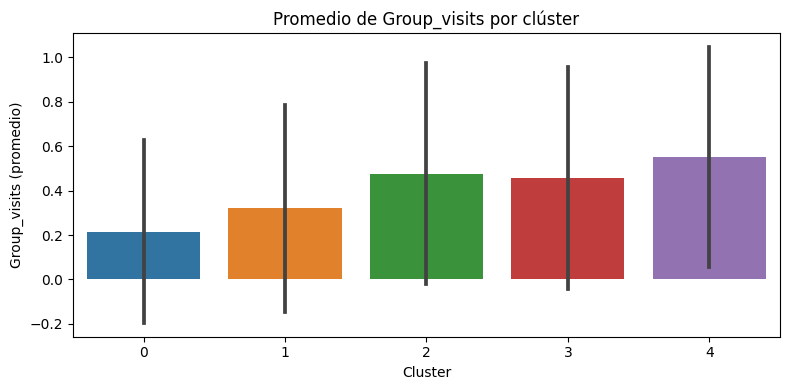

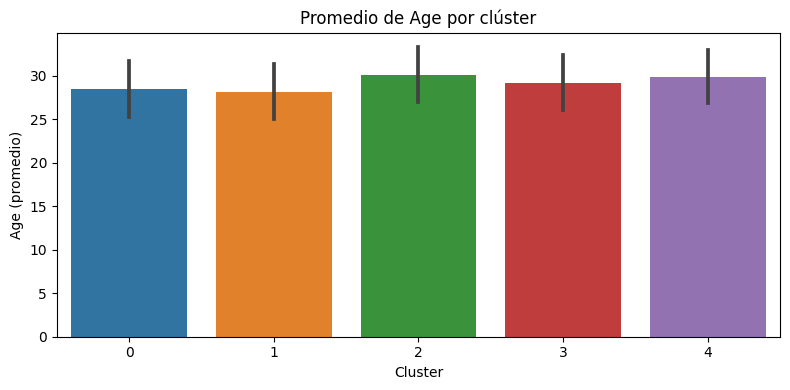

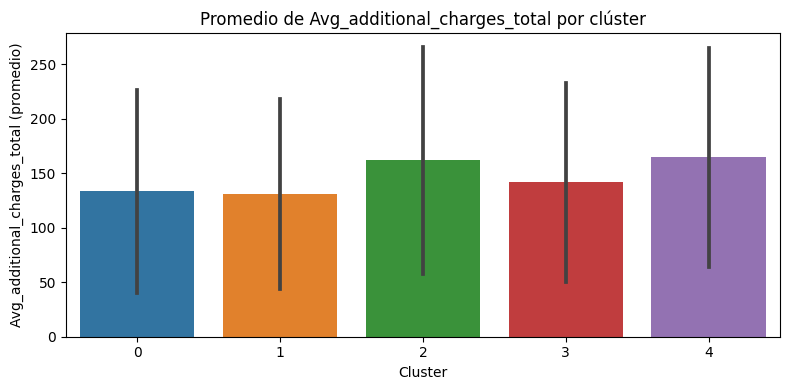

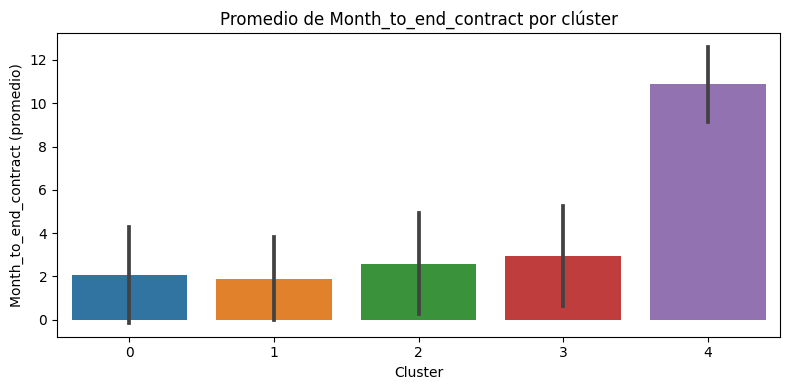

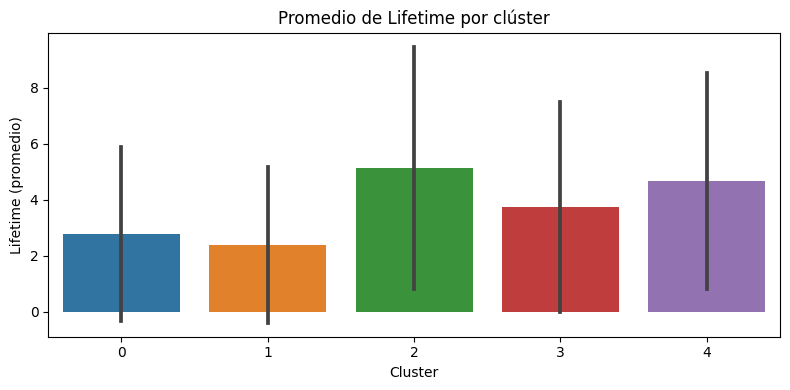

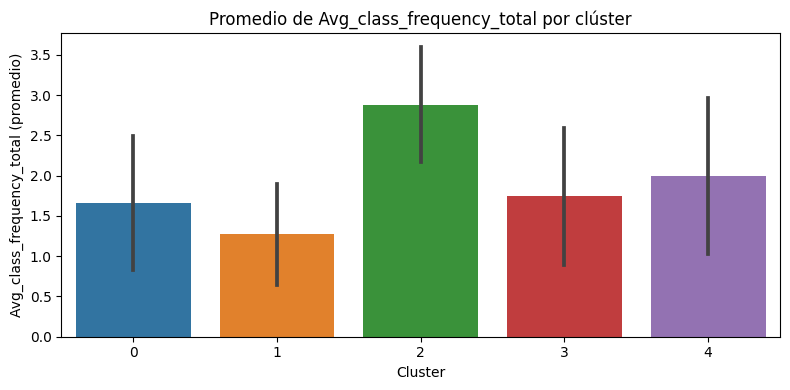

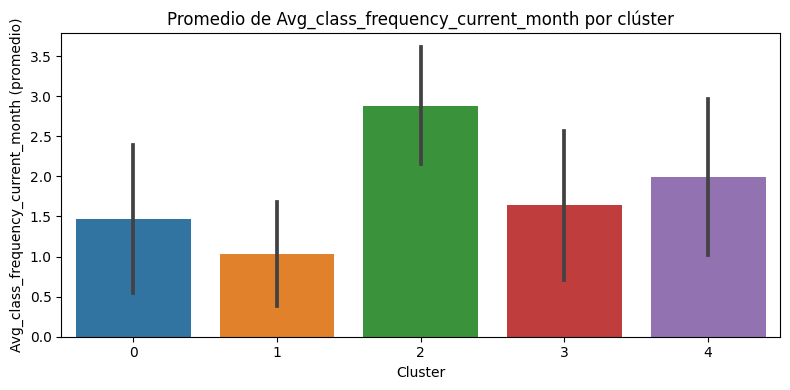

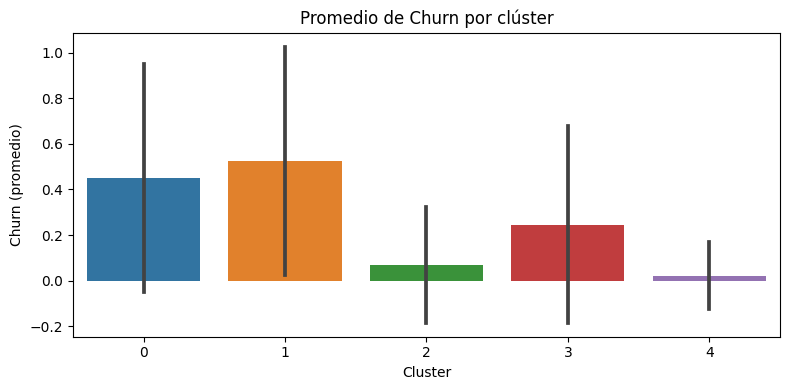

In [39]:
for col in new_columns:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=data_gym, x='cluster_km', y=col, palette='tab10', ci='sd')
    plt.title(f'Promedio de {col} por clúster')
    plt.xlabel('Cluster')
    plt.ylabel(f'{col} (promedio)')
    
    plt.tight_layout()
    plt.show()

In [40]:
# Tasa de cancelación de los cluster
clusters = data_gym.groupby('cluster_km')['Churn'].mean()
print(clusters)

cluster_km
0    0.450368
1    0.526649
2    0.069100
3    0.246130
4    0.022436
Name: Churn, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Alexis! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Excelente manejo inicial de los datos, cargando y mostrando las primeras filas para obtener una visión general.<br>
• Uso efectivo de la agrupación para analizar diferencias entre clientes que cancelaron y los que no.<br>
• Visualizaciones claras y bien estructuradas, especialmente la matriz de correlación.<br>
• Implementación correcta de la normalización de datos antes del modelado.<br>
• Evaluación detallada de las métricas de los modelos, mostrando un buen entendimiento de su desempeño.<br>
• Aplicación adecuada de técnicas de agrupamiento jerárquico para explorar patrones en los datos.<br>
• Uso correcto de técnicas de preprocesamiento como la transformación de datos.<br>
• Inclusión de múltiples modelos para comparar y contrastar resultados.<br>
• Interpretación adecuada de los resultados de los modelos, destacando sus fortalezas y debilidades.<br>
• Presentación visual atractiva y clara de los resultados, facilitando su interpretación.<br>
¡Felicidades!
</div>


## Conclusión Parte 3

Se dividieron a los usuarios en 5 clusters, el cluster 4 y 0 son los que presentaron el mayor promedio de perdidad de usuarios, estos cluster se caracterizaron por presentar las menores frecuencia nmedia de visitas semanales y mensuales, la menor antiguedad promedio en el gimnasio. Además pagaban por contratos de menor duración y les faltaba poco tiempo para concluir su contrato, y en promedio, tenian menor participación en sesiones grupales ni ingresaron con una promoción de amigos. Por el contrario, el cluster 2 presento el menor indice de abandono, seguido por el cluster 2, ambos se caracterizaron por presentar una alta frecuencia de visitas semanales y una mayor antiguedad en torno a los 4-5 meses, el grupo 2 en promedio pagaba por los contratos de mayor duración

# Conclusiones finales

Se obtuvieron 5 grupos que pueden relacionarse fuertemente a la probabilidad de cancelación, para aumentar la retención de los usuarios se recomienda promociones para nuevos usuarios para ingresar con amigos y/o promociones en los contratos de periodos más grandes. Los grupos con menor perdida de usuarios presentaban una mayor antiguedad, en torno a los 4 o 5 meses, si se promueve la permanencia de los usuarios por más de 4 o 5 meses en nuevos usuarios, podrian aumentar la permanencia de estos usuarios, esto podria deberse a la formación de habitos de entrenamiento y la obsevación de las primeras ganancias fisicas notables que aumente la motivación de los usuarios. Tambien se observó que los usuarios cuyas membresias estaban proximas a vences, presentaban una mayor tendencia a abandonar el gimnasio, por lo que se propone realizar descuentos por pronto pago de mensualidad. 